In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
train=pd.read_csv("/content/Train.csv")
test=pd.read_csv("/content/Test.csv")
target=train.pop("tumor_size")
sub=pd.read_csv("/content/sample_submission.csv")
data=pd.concat([train,test],ignore_index=True)

In [3]:
data.isnull().sum() , data.shape


(mass_npea         0
 size_npear        0
 malign_ratio      0
 damage_size       0
 exposed_area      0
 std_dev_malign    0
 err_malign        0
 malign_penalty    0
 damage_ratio      0
 dtype: int64, (45730, 9))

In [4]:
data.head(5)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,6930.90,2919.02,0.42116,51.8298,988829.407,109.487,2758.76,72,39.3620
1,15635.70,4879.36,0.31206,223.5500,2058426.301,248.881,5952.53,240,22.0253
2,10376.20,2613.88,0.25191,127.3370,1434676.100,160.093,4635.26,73,29.9963
3,13093.80,4510.06,0.34444,155.4400,1812195.183,173.015,5273.87,32,28.1354
4,7545.21,2882.36,0.38201,85.1237,1043917.501,124.414,3263.35,57,35.0200


In [5]:
data.dtypes


mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
dtype: object

In [6]:
data.describe()


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
count,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [7]:
data.corr()


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
mass_npea,1.000000,0.906606,0.126285,0.931056,0.998185,0.967531,0.554002,0.651251,-0.898240
size_npear,0.906606,1.000000,0.502562,0.793143,0.902853,0.908354,0.515929,0.584242,-0.786188
malign_ratio,0.126285,0.502562,1.000000,0.031230,0.122622,0.200650,0.080064,0.095340,-0.069039
damage_size,0.931056,0.793143,0.031230,1.000000,0.925707,0.938108,0.485185,0.676919,-0.891766
exposed_area,0.998185,0.902853,0.122622,0.925707,1.000000,0.961769,0.553729,0.642961,-0.897765
std_dev_malign,0.967531,0.908354,0.200650,0.938108,0.961769,1.000000,0.538198,0.662584,-0.881973
err_malign,0.554002,0.515929,0.080064,0.485185,0.553729,0.538198,1.000000,0.347030,-0.521148
malign_penalty,0.651251,0.584242,0.095340,0.676919,0.642961,0.662584,0.347030,1.000000,-0.637287
damage_ratio,-0.898240,-0.786188,-0.069039,-0.891766,-0.897765,-0.881973,-0.521148,-0.637287,1.000000


In [8]:
def nor(x):
  sk=x.skew()
  sq=(np.sqrt(x)).skew()
  lg=(np.log1p(x)).skew()
  return {"skew":sk,"sqrt":sq,"log":lg}

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

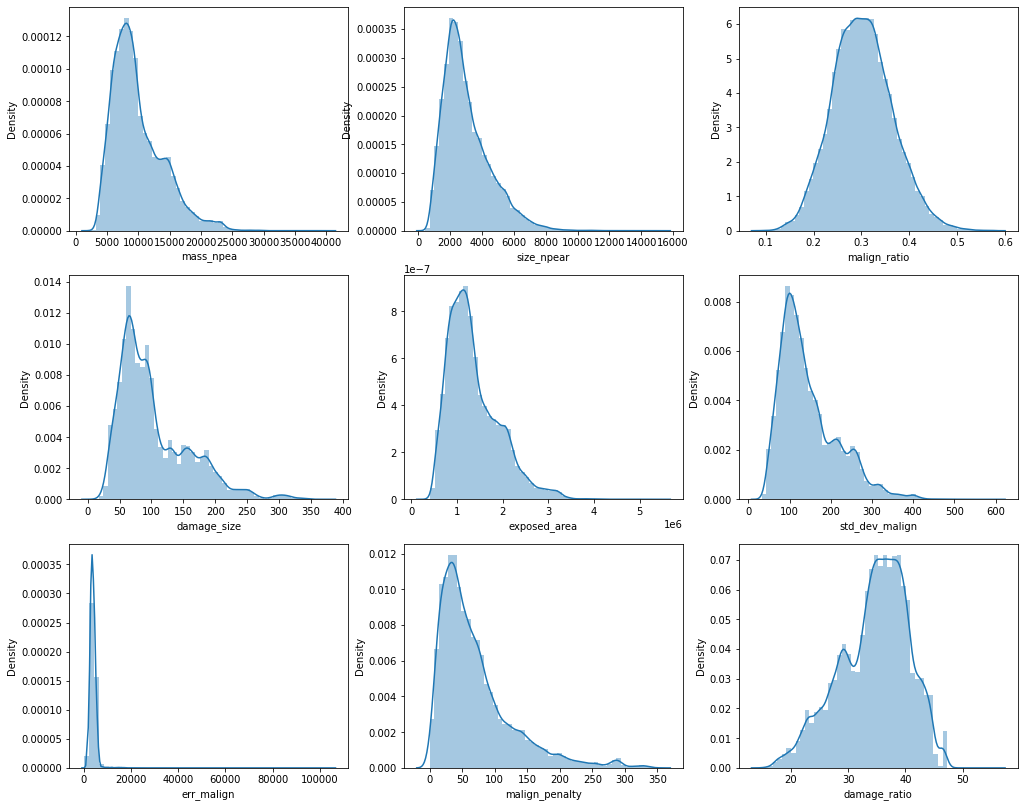

In [9]:
plt.figure(figsize=(17,14))
plt.subplot(3,3,1)
sns.distplot(data.mass_npea)
plt.subplot(3,3,2)
sns.distplot(data.size_npear)
plt.subplot(3,3,3)
sns.distplot(data.malign_ratio)
plt.subplot(3,3,4)
sns.distplot(data.damage_size)
plt.subplot(3,3,5)
sns.distplot(data.exposed_area)
plt.subplot(3,3,6)
sns.distplot(data.std_dev_malign)
plt.subplot(3,3,7)
sns.distplot(data.err_malign)
plt.subplot(3,3,8)
sns.distplot(data.malign_penalty)
plt.subplot(3,3,9)
sns.distplot(data.damage_ratio)

In [10]:
data.columns


Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio'],
      dtype='object')

In [11]:
from IPython.display import display
display(print("1. mass_npea"))
display(nor(data.mass_npea))
display(print("2. size_npear"))
display(nor(data.size_npear))
display(print("3. malign_ratio"))
nor(data.malign_ratio)
display(print("4. damage_size"))
display(nor(data.damage_size))
display(print("5. exposed_area"))
display(nor(data.exposed_area))
display(print("6. std_dev_malign"))
display(nor(data.std_dev_malign))
display(print("7. err_malign"))
display(nor(data.err_malign))
display(print("8. malign_penalty"))
display(nor(data.malign_penalty))
display(print("9. damage_ratio"))
display(nor(data.damage_ratio))

1. mass_npea


None

{'log': 0.13277783894849488,
 'skew': 1.0922013818038485,
 'sqrt': 0.5990078684955066}

2. size_npear


None

{'log': -0.07659414382230043,
 'skew': 1.1906519653249468,
 'sqrt': 0.5420932327600916}

3. malign_ratio


None

4. damage_size


None

{'log': 0.15951235087970422,
 'skew': 1.225103138079907,
 'sqrt': 0.6857948051877383}

5. exposed_area


None

{'log': 0.10731821330735172,
 'skew': 1.058766989823386,
 'sqrt': 0.5704827229917164}

6. std_dev_malign


None

{'log': 0.11882170779416629,
 'skew': 1.120759900387105,
 'sqrt': 0.6146481212041276}

7. err_malign


None

{'log': -0.21246048244341043,
 'skew': 20.76264434293341,
 'sqrt': 3.88922744635358}

8. malign_penalty


None

{'log': -0.5021134141747344,
 'skew': 1.682933176719256,
 'sqrt': 0.6690790196434717}

9. damage_ratio


None

{'log': -0.9176452841856719,
 'skew': -0.4726457982840867,
 'sqrt': -0.6942170704353294}

In [12]:
t=pd.concat([train,test],ignore_index=True)

In [13]:
t.head(1)


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,6930.9,2919.02,0.42116,51.8298,988829.407,109.487,2758.76,72,39.362


In [14]:
t.mass_npea=np.sqrt(t.mass_npea)


In [15]:

t.size_npear=np.log1p(t.size_npear)
size=np.log1p(t.size_npear)

In [16]:

t.malign_ratio=np.log1p(t.malign_ratio)

In [17]:
t.damage_size=np.sqrt(t.damage_size)

In [18]:
t.exposed_area=np.sqrt(t.exposed_area)

In [19]:
t.std_dev_malign=np.log1p(t.std_dev_malign)

In [20]:
t.malign_penalty=np.sqrt(t.malign_penalty)

In [21]:
#Dropping features with high corr
t.drop("size_npear",axis=1,inplace=True)

In [22]:
#FEATURE ENGINEERING
t["p/e"]=t.malign_penalty/t.err_malign
t["mass/exposed_area"]=(t.mass_npea/t.exposed_area)
t["mass/std"]=t.mass_npea/t.std_dev_malign
t["error/std"]=t.err_malign/t.std_dev_malign
t["m/a*s"]=t["mass/exposed_area"]*t.damage_size
t["m/a_sqrt"]=np.sqrt(t["mass/exposed_area"])
t["error-penalty"]=t.damage_ratio-t.malign_ratio
t["FE1"]=t["mass/exposed_area"]*t["p/e"]
t["FE2"]=t["mass/exposed_area"]*t["mass/std"]
t["FE3"]=t.malign_ratio+t.std_dev_malign
t["FE4"]=t.damage_ratio-t.std_dev_malign
t["FE5"]=t["m/a*s"]-t.malign_ratio

In [23]:
t.head(3)

,mass_npea,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,p/e,mass/exposed_area,mass/std,error/std,m/a*s,m/a_sqrt,error-penalty,FE1,FE2,FE3,FE4,FE5
0,83.252027,0.351473,7.199292,994.399018,4.704898,2758.76,8.485281,39.3620,0.003076,0.083721,17.694758,586.359168,0.602732,0.289346,39.010527,0.000258,1.481422,5.056371,34.657102,0.251258
1,125.042793,0.271598,14.951589,1434.721681,5.520985,5952.53,15.491933,22.0253,0.002603,0.087155,22.648639,1078.164532,1.303102,0.295220,21.753702,0.000227,1.973936,5.792583,16.504315,1.031503
2,101.863634,0.224670,11.284370,1197.779654,5.081982,4635.26,8.544004,29.9963,0.001843,0.085044,20.044077,912.096924,0.959665,0.291623,29.771630,0.000157,1.704623,5.306652,24.914318,0.734994


In [24]:
t.shape, train.shape , test.shape , target.shape

((45730, 20), (9146, 9), (36584, 9), (9146,))

In [25]:
#data splitting
trn=t[0:9146]
tst=t[9146:]

In [26]:
#ENSEMBLING
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor

bag=BaggingRegressor(n_estimators=150,max_features=13)
lgb=LGBMRegressor(n_estimators=900,num_leaves=48,reg_lambda=50,reg_alpha=20)
etc=ExtraTreesRegressor(n_estimators=400,max_depth=26,min_samples_split=2,max_features=10)

In [27]:

tst.loc[tst["err_malign"] == 0.0]

,mass_npea,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,p/e,mass/exposed_area,mass/std,error/std,m/a*s,m/a_sqrt,error-penalty,FE1,FE2,FE3,FE4,FE5
9526,129.032554,0.315446,13.467516,1499.067596,5.555596,0.0,11.532563,25.3804,inf,0.086075,23.225692,0.0,1.159219,0.293386,25.064954,inf,1.999156,5.871041,19.824804,0.843774


In [28]:
tst["p/e"][9526]=-1
tst["FE1"][9526]=-1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
estimators=[("bag",bag),("lgb",lgb),("etc",etc)]

In [30]:
reg = StackingRegressor(estimators=estimators)

In [31]:
scores=cross_val_score(reg, trn,target, cv = 5, scoring = "neg_root_mean_squared_error")
scores.mean()

-3.5806480493257213

In [32]:
reg.fit(trn,target)
pre=reg.predict(tst)
sub["tumor_size"]=pre
sub.to_csv("sub_02.csv",index=False)